# Manga Character Generative Adversarial Network (GAN)

- Author: [Theo BIET](https://www.github.com/TheoBIET)
- Date: 29/04/2022
- License: MIT
- Version: 0.1
- Base Data: [Anime Names and Images Dataset](https://www.kaggle.com/datasets/shanmukh05/anime-names-and-image-generation)

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import skimage
import glob

# Declate constants variables

In [2]:
TARGET_SIZE = (128, 128, 3)
NUM_EPOCHS = 100
BATCH_SIZE = 64
DATASET_PATH = './dataset/'
IMAGE_EXTENSION = 'jpg'
SAVE_PATH = {
    'generator': './models/generator.h5',
    'discriminator': './models/discriminator.h5',
    'combined': './models/combined.h5',
    'generated_images': './generated_images/'
}

# Load dataset

In [3]:
def load_dataset():
    files = glob.glob(f'{DATASET_PATH}*.{IMAGE_EXTENSION}')
    temp_dataset = []
    for image_path in files[:50]:
        temp_image = mpimg.imread(image_path)
        temp_image = skimage.transform.resize(temp_image, TARGET_SIZE)
        temp_image = np.array(temp_image, dtype=np.float32)
        temp_dataset.append(temp_image)
    return np.array(temp_dataset)

images = load_dataset()
print(f'{len(images)} images loaded with shape {images.shape}')

50 images loaded with shape (50, 128, 128, 3)


# Visualize example images

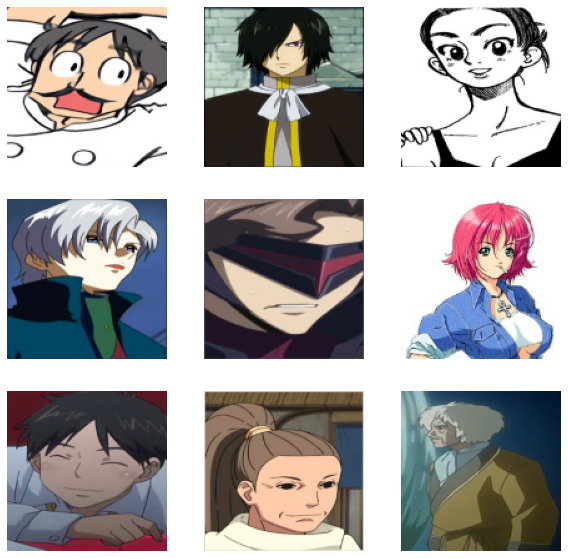

In [4]:
preview_images = images[:9]
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i in range(len(preview_images)):
    plot = ax[i // 3, i % 3]
    plot.imshow(preview_images[i])
    plot.axis('off')